In [227]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

In [228]:
df = pd.read_csv("./../data/external/Electric_Vehicle_Population_Data.csv")

In [229]:
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1N4AZ0CP8D,King,Shoreline,WA,98177.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,0.0,32.0,125450447,POINT (-122.36498 47.72238),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10
1,5YJSA1E45K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270.0,0.0,43.0,101662900,POINT (-122.30207 47.64085),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
2,WVGUNPE28M,Kitsap,Olalla,WA,98359.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,272118717,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10
3,JTDKARFP6H,Thurston,Olympia,WA,98501.0,2017,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,0.0,22.0,349372929,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,5.306701e+10
4,1FADP5CU9G,Thurston,Olympia,WA,98506.0,2016,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19.0,0.0,22.0,171625653,POINT (-122.87741 47.05997),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216767,1G1RB6E44D,Douglas,East Wenatchee,WA,98802.0,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38.0,0.0,12.0,122822822,POINT (-120.29473 47.41515),PUD NO 1 OF DOUGLAS COUNTY,5.301795e+10
216768,KNDCS3LF9R,Whatcom,Bellingham,WA,98229.0,2024,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33.0,0.0,40.0,267143887,POINT (-122.45486 48.7449),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307300e+10
216769,7SAYGAEE9R,King,Redmond,WA,98052.0,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,48.0,274988388,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
216770,1G1RB6E49D,Pierce,Gig Harbor,WA,98329.0,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38.0,0.0,26.0,117353064,POINT (-122.6658 47.38336),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216772 entries, 0 to 216771
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         216772 non-null  object 
 1   County                                             216767 non-null  object 
 2   City                                               216767 non-null  object 
 3   State                                              216772 non-null  object 
 4   Postal Code                                        216767 non-null  float64
 5   Model Year                                         216772 non-null  int64  
 6   Make                                               216772 non-null  object 
 7   Model                                              216772 non-null  object 
 8   Electric Vehicle Type                              216772 non-null  object

In [231]:
df.describe(include="O")

,VIN (1-10),County,City,State,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Vehicle Location,Electric Utility
count,216772,216767,216767,216772,216772,216772,216772,216772,216761,216767
unique,12624,205,762,47,44,155,2,3,932,75
top,7SAYGDEE7P,King,Seattle,WA,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
freq,1220,110164,34754,216321,93931,45231,171184,124101,5405,78940


In [232]:
df.describe(include=np.number)

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,216767.000000,216772.000000,216753.000000,216753.000000,216321.000000,2.167720e+05,2.167670e+05
mean,98179.750714,2021.129039,49.428386,870.987045,28.920114,2.304479e+08,5.298157e+10
std,2458.320323,2.983918,86.224511,7544.671592,14.907934,7.044964e+07,1.514710e+09
min,1731.000000,1999.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,1.962328e+08,5.303301e+10
50%,98125.000000,2022.000000,0.000000,0.000000,32.000000,2.440312e+08,5.303303e+10
75%,98374.000000,2023.000000,42.000000,0.000000,42.000000,2.649070e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


In [233]:
df.nunique(axis=0)

VIN (1-10)                                            12624
County                                                  205
City                                                    762
State                                                    47
Postal Code                                             934
Model Year                                               21
Make                                                     44
Model                                                   155
Electric Vehicle Type                                     2
Clean Alternative Fuel Vehicle (CAFV) Eligibility         3
Electric Range                                          106
Base MSRP                                                31
Legislative District                                     49
DOL Vehicle ID                                       216772
Vehicle Location                                        932
Electric Utility                                         75
2020 Census Tract                       

In [234]:
df.isna().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        19
Base MSRP                                             19
Legislative District                                 451
DOL Vehicle ID                                         0
Vehicle Location                                      11
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [235]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [236]:
df.columns = ["VIN", "COUNTY", "CITY", "STATE", "ZIP", "MODEL_YEAR", "MAKE", "MODEL", "TYPE", "CAFV", "E_RANGE", "MSRP", "DISTRICT", "DOL_ID", "LOCATION", "E_UTILITY", "2020_CENSUS"]

In [237]:
df[["VIN", "COUNTY", "CITY", "STATE", "MAKE", "MODEL", "E_UTILITY"]] =\
    df[["VIN", "COUNTY", "CITY", "STATE", "MAKE", "MODEL", "E_UTILITY"]].astype(str)
    
df[["TYPE", "CAFV"]] = df[["TYPE", "CAFV"]].astype("category")

df[["ZIP", "MODEL_YEAR", "DISTRICT", "E_RANGE", "DOL_ID", "2020_CENSUS"]] =\
    df[["ZIP", "MODEL_YEAR", "DISTRICT", "E_RANGE", "DOL_ID", "2020_CENSUS"]]\
        .apply(pd.to_numeric, errors="coerce").fillna(0).astype(int)
df

,VIN,COUNTY,CITY,STATE,ZIP,MODEL_YEAR,MAKE,MODEL,TYPE,CAFV,E_RANGE,MSRP,DISTRICT,DOL_ID,LOCATION,E_UTILITY,2020_CENSUS
0,1N4AZ0CP8D,King,Shoreline,WA,98177,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0.0,32,125450447,POINT (-122.36498 47.72238),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033020100
1,5YJSA1E45K,King,Seattle,WA,98112,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0.0,43,101662900,POINT (-122.30207 47.64085),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033006300
2,WVGUNPE28M,Kitsap,Olalla,WA,98359,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0.0,26,272118717,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,53035092803
3,JTDKARFP6H,Thurston,Olympia,WA,98501,2017,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0.0,22,349372929,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,53067010400
4,1FADP5CU9G,Thurston,Olympia,WA,98506,2016,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0.0,22,171625653,POINT (-122.87741 47.05997),PUGET SOUND ENERGY INC,53067010300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216767,1G1RB6E44D,Douglas,East Wenatchee,WA,98802,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0.0,12,122822822,POINT (-120.29473 47.41515),PUD NO 1 OF DOUGLAS COUNTY,53017950400
216768,KNDCS3LF9R,Whatcom,Bellingham,WA,98229,2024,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,0.0,40,267143887,POINT (-122.45486 48.7449),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,53073001202
216769,7SAYGAEE9R,King,Redmond,WA,98052,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0.0,48,274988388,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032325
216770,1G1RB6E49D,Pierce,Gig Harbor,WA,98329,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0.0,26,117353064,POINT (-122.6658 47.38336),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,53053072601


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216772 entries, 0 to 216771
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   VIN          216772 non-null  object  
 1   COUNTY       216772 non-null  object  
 2   CITY         216772 non-null  object  
 3   STATE        216772 non-null  object  
 4   ZIP          216772 non-null  int64   
 5   MODEL_YEAR   216772 non-null  int64   
 6   MAKE         216772 non-null  object  
 7   MODEL        216772 non-null  object  
 8   TYPE         216772 non-null  category
 9   CAFV         216772 non-null  category
 10  E_RANGE      216772 non-null  int64   
 11  MSRP         216753 non-null  float64 
 12  DISTRICT     216772 non-null  int64   
 13  DOL_ID       216772 non-null  int64   
 14  LOCATION     216761 non-null  object  
 15  E_UTILITY    216772 non-null  object  
 16  2020_CENSUS  216772 non-null  int64   
dtypes: category(2), float64(1), int64(6), object(8)


In [239]:
df["LOCATION"] = df["LOCATION"].replace({np.nan: "POINT (0 0)"})
coord_func = lambda x: tuple(map(float, re.sub(r"POINT \((.*)\)", r"\1", x).split()))
df["LOCATION"] = df["LOCATION"].apply(coord_func)
df.loc[df["LOCATION"] == (0,0), "LOCATION"] = np.nan
df

,VIN,COUNTY,CITY,STATE,ZIP,MODEL_YEAR,MAKE,MODEL,TYPE,CAFV,E_RANGE,MSRP,DISTRICT,DOL_ID,LOCATION,E_UTILITY,2020_CENSUS
0,1N4AZ0CP8D,King,Shoreline,WA,98177,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0.0,32,125450447,"(-122.36498, 47.72238)",CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033020100
1,5YJSA1E45K,King,Seattle,WA,98112,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0.0,43,101662900,"(-122.30207, 47.64085)",CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033006300
2,WVGUNPE28M,Kitsap,Olalla,WA,98359,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0.0,26,272118717,"(-122.54729, 47.42602)",PUGET SOUND ENERGY INC,53035092803
3,JTDKARFP6H,Thurston,Olympia,WA,98501,2017,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0.0,22,349372929,"(-122.89166, 47.03956)",PUGET SOUND ENERGY INC,53067010400
4,1FADP5CU9G,Thurston,Olympia,WA,98506,2016,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0.0,22,171625653,"(-122.87741, 47.05997)",PUGET SOUND ENERGY INC,53067010300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216767,1G1RB6E44D,Douglas,East Wenatchee,WA,98802,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0.0,12,122822822,"(-120.29473, 47.41515)",PUD NO 1 OF DOUGLAS COUNTY,53017950400
216768,KNDCS3LF9R,Whatcom,Bellingham,WA,98229,2024,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,0.0,40,267143887,"(-122.45486, 48.7449)",PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,53073001202
216769,7SAYGAEE9R,King,Redmond,WA,98052,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0.0,48,274988388,"(-122.13158, 47.67858)",PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032325
216770,1G1RB6E49D,Pierce,Gig Harbor,WA,98329,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0.0,26,117353064,"(-122.6658, 47.38336)",BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,53053072601


In [240]:
df["LOCATION_X"] = df["LOCATION"].dropna().apply(lambda t: t[0])
df["LOCATION_Y"] = df["LOCATION"].dropna().apply(lambda t: t[1])

In [241]:
df[["LOCATION", "LOCATION_X", "LOCATION_Y"]]

,LOCATION,LOCATION_X,LOCATION_Y
0,"(-122.36498, 47.72238)",-122.36498,47.72238
1,"(-122.30207, 47.64085)",-122.30207,47.64085
2,"(-122.54729, 47.42602)",-122.54729,47.42602
3,"(-122.89166, 47.03956)",-122.89166,47.03956
4,"(-122.87741, 47.05997)",-122.87741,47.05997
...,...,...,...
216767,"(-120.29473, 47.41515)",-120.29473,47.41515
216768,"(-122.45486, 48.7449)",-122.45486,48.74490
216769,"(-122.13158, 47.67858)",-122.13158,47.67858
216770,"(-122.6658, 47.38336)",-122.66580,47.38336


In [242]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [243]:
def fancify(axes):
    """add features to cartopy axes"""
    axes.stock_img()
    axes.add_feature(cartopy.feature.LAND)
    axes.add_feature(cartopy.feature.STATES)
    axes.add_feature(cartopy.feature.OCEAN)
    axes.add_feature(cartopy.feature.COASTLINE)
    axes.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
    # axes.add_feature(cartopy.feature.LAKES, alpha=0.95)
    # axes.add_feature(cartopy.feature.RIVERS)

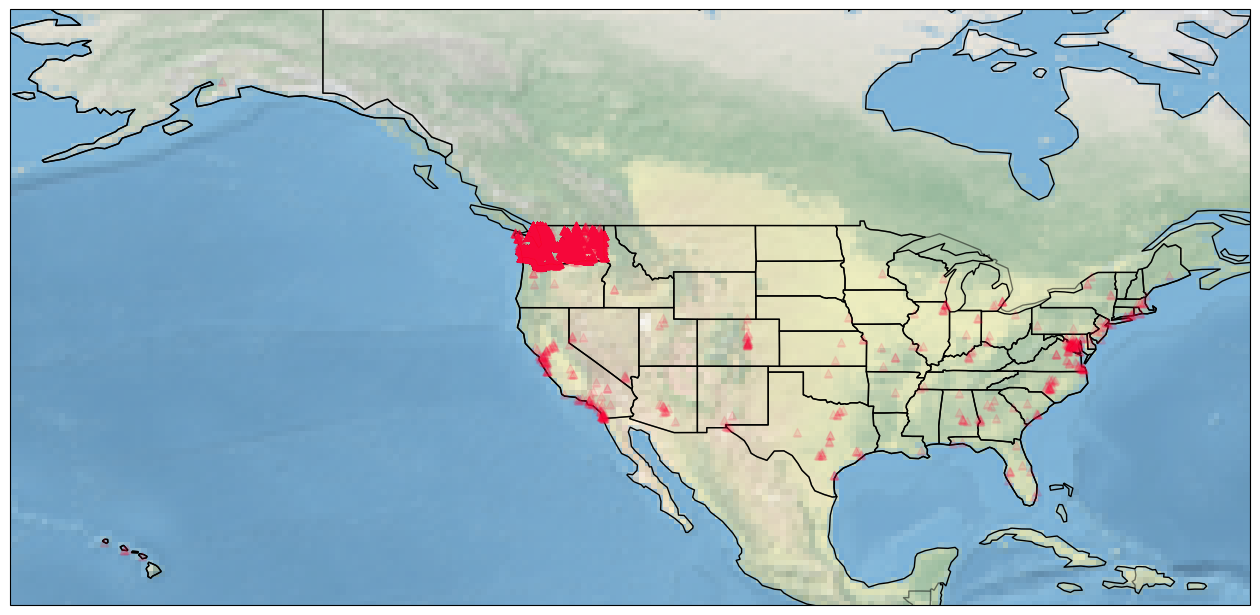

In [244]:
map_crs = ccrs.PlateCarree()
data_crs = ccrs.PlateCarree()

plt.close()
plt.figure(figsize=(16,10))
ax1 = plt.subplot(1, 1, 1, projection=map_crs)  # create map axes

fancify(ax1)                                    # add some features to map

min_la = df["LOCATION_X"].min()
max_la = df["LOCATION_X"].max()

min_lo = df["LOCATION_Y"].min()
max_lo = df["LOCATION_Y"].max()


ax1.set_extent([min_la, max_la, min_lo, max_lo], map_crs)         # min/max long and lat

ax1.scatter(df["LOCATION_X"].dropna(), df["LOCATION_Y"].dropna(),marker="^",zorder=4,color="xkcd:neon red", alpha=0.1)  # longitutes , latitudes

ax1.set_ybound(min_lo*0.80, max_lo*1.1)
ax1.set_xbound(min_la*1.05, max_la*0.9)

Text(0.5, 0.98, 'Value counts per state')

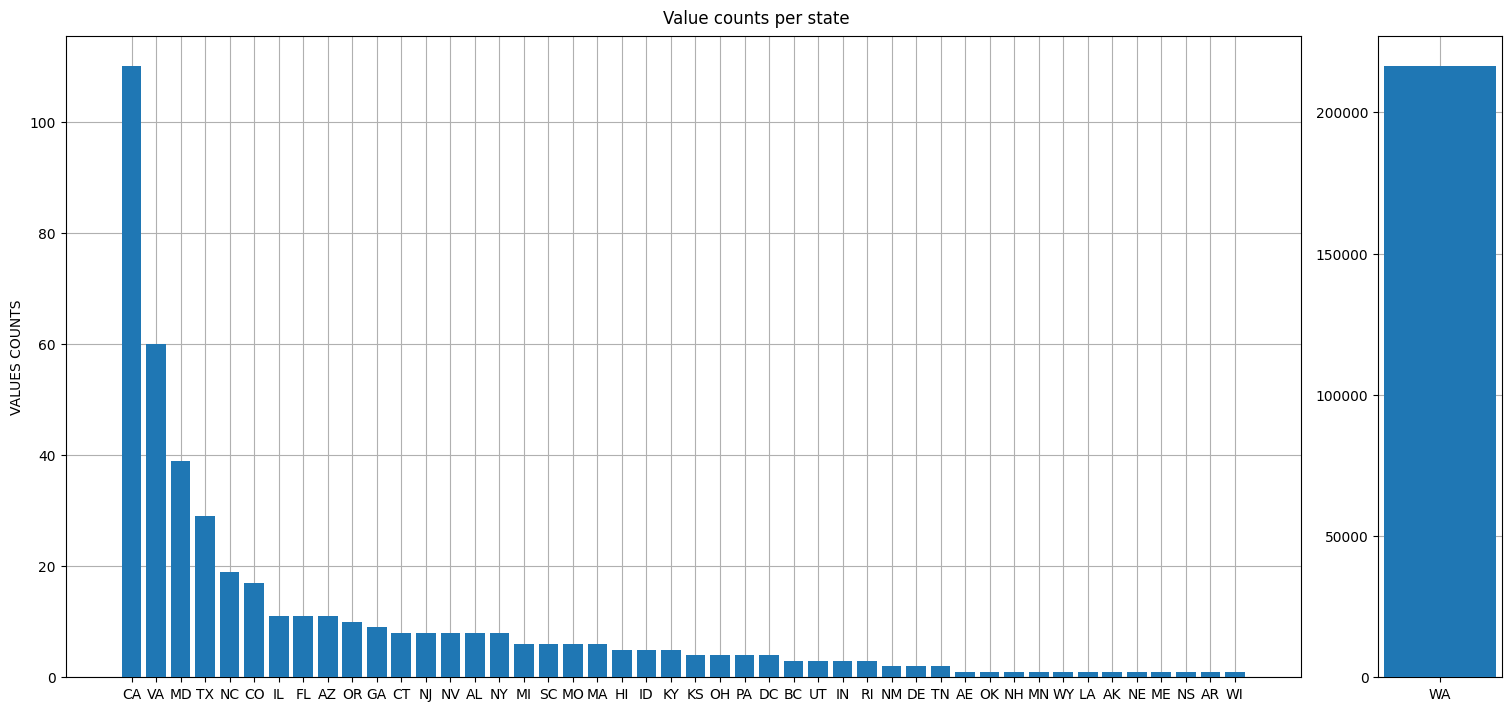

In [245]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, width_ratios=[10,1])
fig.set_size_inches(15,7)
fig.set_constrained_layout(True)
ax1: plt.Axes 
ax2: plt.Axes
ax1.grid(zorder=0)
ax2.grid(zorder=0)

ax1.bar(df.loc[df["STATE"]!="WA", "STATE"].value_counts().index, df.loc[df["STATE"]!="WA", "STATE"].value_counts(), zorder=3)
ax2.bar(df.loc[df["STATE"]=="WA", "STATE"].value_counts().index, df.loc[df["STATE"]=="WA", "STATE"].value_counts(), zorder=3)
ax1.set_ylabel("VALUES COUNTS")
fig.suptitle("Value counts per state")

In [246]:
df_wa = df[df["STATE"] == "WA"]
df_wa

,VIN,COUNTY,CITY,STATE,ZIP,MODEL_YEAR,MAKE,MODEL,TYPE,CAFV,E_RANGE,MSRP,DISTRICT,DOL_ID,LOCATION,E_UTILITY,2020_CENSUS,LOCATION_X,LOCATION_Y
0,1N4AZ0CP8D,King,Shoreline,WA,98177,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0.0,32,125450447,"(-122.36498, 47.72238)",CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033020100,-122.36498,47.72238
1,5YJSA1E45K,King,Seattle,WA,98112,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0.0,43,101662900,"(-122.30207, 47.64085)",CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033006300,-122.30207,47.64085
2,WVGUNPE28M,Kitsap,Olalla,WA,98359,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0.0,26,272118717,"(-122.54729, 47.42602)",PUGET SOUND ENERGY INC,53035092803,-122.54729,47.42602
3,JTDKARFP6H,Thurston,Olympia,WA,98501,2017,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0.0,22,349372929,"(-122.89166, 47.03956)",PUGET SOUND ENERGY INC,53067010400,-122.89166,47.03956
4,1FADP5CU9G,Thurston,Olympia,WA,98506,2016,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0.0,22,171625653,"(-122.87741, 47.05997)",PUGET SOUND ENERGY INC,53067010300,-122.87741,47.05997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216767,1G1RB6E44D,Douglas,East Wenatchee,WA,98802,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0.0,12,122822822,"(-120.29473, 47.41515)",PUD NO 1 OF DOUGLAS COUNTY,53017950400,-120.29473,47.41515
216768,KNDCS3LF9R,Whatcom,Bellingham,WA,98229,2024,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,0.0,40,267143887,"(-122.45486, 48.7449)",PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,53073001202,-122.45486,48.74490
216769,7SAYGAEE9R,King,Redmond,WA,98052,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0.0,48,274988388,"(-122.13158, 47.67858)",PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032325,-122.13158,47.67858
216770,1G1RB6E49D,Pierce,Gig Harbor,WA,98329,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0.0,26,117353064,"(-122.6658, 47.38336)",BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,53053072601,-122.66580,47.38336


In [247]:
import cartopy.io.img_tiles as cimgt
import seaborn as sns

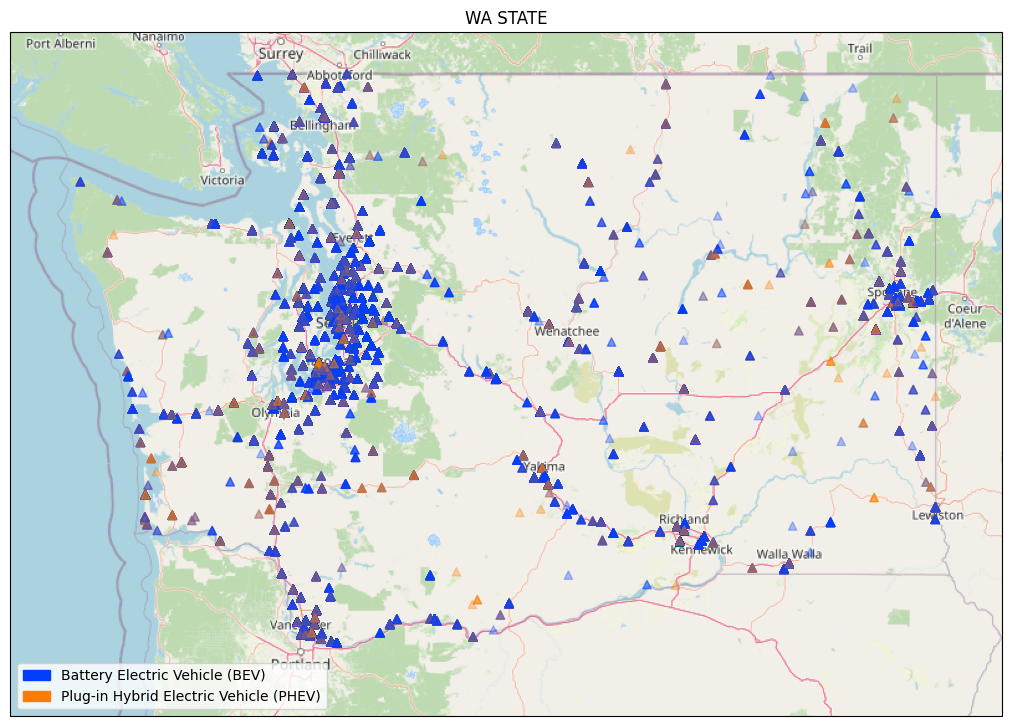

In [248]:
request = cimgt.OSM()
fig, ax = plt.subplots(figsize=(10,16),
                       subplot_kw=dict(projection=request.crs))

fig.set_constrained_layout(True)
min_la = df_wa["LOCATION_X"].min()*1.005
max_la = df_wa["LOCATION_X"].max()*0.995

min_lo = df_wa["LOCATION_Y"].min()*0.99
max_lo = df_wa["LOCATION_Y"].max()*1.005

extent = [min_la, max_la, min_lo, max_lo]
ax.set_extent(extent, map_crs)
ax.add_image(request, 7)

colors = dict(zip(df_wa["TYPE"].unique(), sns.color_palette("bright", len(df_wa["TYPE"].unique()), as_cmap=True)))

xynps = ax.projection.transform_points(ccrs.Geodetic(), df_wa["LOCATION_X"], df_wa["LOCATION_Y"])
ax.scatter(x = xynps[:,0], y=xynps[:,1], zorder=3, marker="^", c=df_wa["TYPE"].map(colors), alpha=0.3)
ax.set_title("WA STATE")

handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors.values()]
labels = list(colors.keys())
plt.legend(handles, labels)

plt.show()

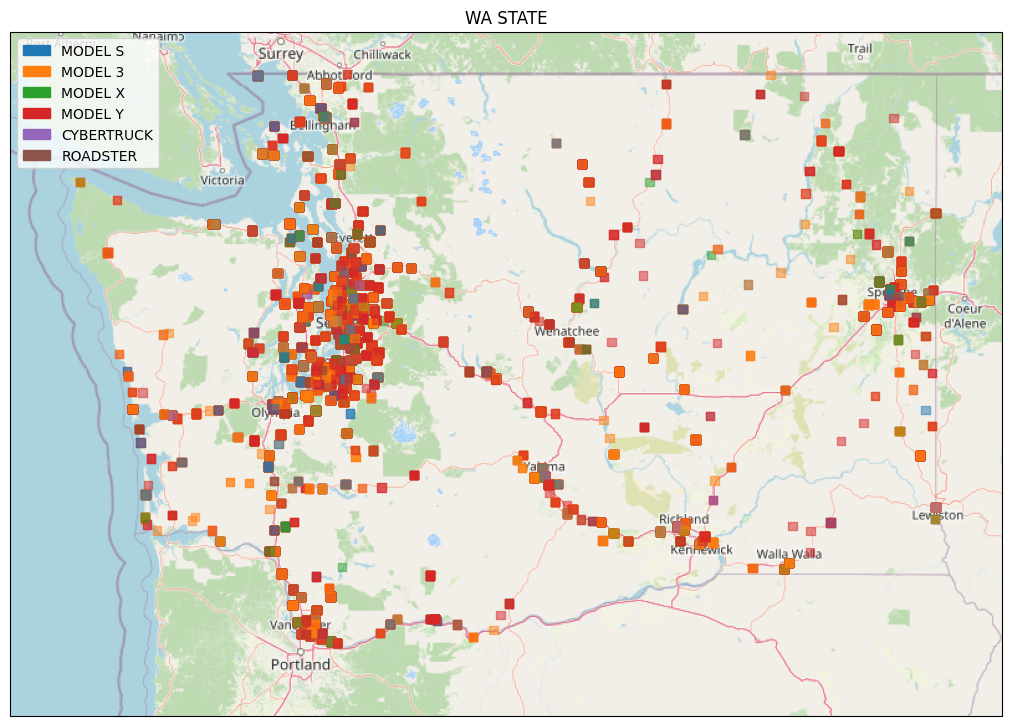

In [249]:
request = cimgt.OSM()
fig, ax = plt.subplots(figsize=(10,16),
                       subplot_kw=dict(projection=request.crs))

df_plot = df_wa[df_wa["MAKE"] == "TESLA"]

fig.set_constrained_layout(True)
min_la = df_plot["LOCATION_X"].min()*1.005
max_la = df_plot["LOCATION_X"].max()*0.995

min_lo = df_plot["LOCATION_Y"].min()*0.99
max_lo = df_plot["LOCATION_Y"].max()*1.005

extent = [min_la, max_la, min_lo, max_lo]
ax.set_extent(extent, map_crs)
ax.add_image(request, 7)

colors = dict(zip(df_plot["MODEL"].unique(), sns.color_palette("tab10", len(df_plot["MODEL"].unique()))))

xynps = ax.projection.transform_points(ccrs.Geodetic(), df_plot["LOCATION_X"], df_plot["LOCATION_Y"])
ax.scatter(x = xynps[:,0], y=xynps[:,1], zorder=3, marker="s", c=[colors[year] for year in df_plot["MODEL"]], alpha=0.5)
ax.set_title("WA STATE")

handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors.values()]
labels = list(colors.keys())
plt.legend(handles, labels)

plt.show()

/tmp/ipykernel_32353/1118165796.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
/tmp/ipykernel_32353/1118165796.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)


(array([9.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.3000e+01, 0.0000e+00,
        2.4000e+01, 6.9900e+02, 1.5330e+03, 4.2910e+03, 3.4560e+03,
        4.6950e+03, 5.4620e+03, 8.5890e+03, 1.4329e+04, 1.0803e+04,
        1.2191e+04, 2.0012e+04, 2.8505e+04, 6.0182e+04, 4.1515e+04]),
 array([1999.  , 2000.04, 2001.08, 2002.12, 2003.16, 2004.2 , 2005.24,
        2006.28, 2007.32, 2008.36, 2009.4 , 2010.44, 2011.48, 2012.52,
        2013.56, 2014.6 , 2015.64, 2016.68, 2017.72, 2018.76, 2019.8 ,
        2020.84, 2021.88, 2022.92, 2023.96, 2025.  ]),
 <BarContainer object of 25 artists>)

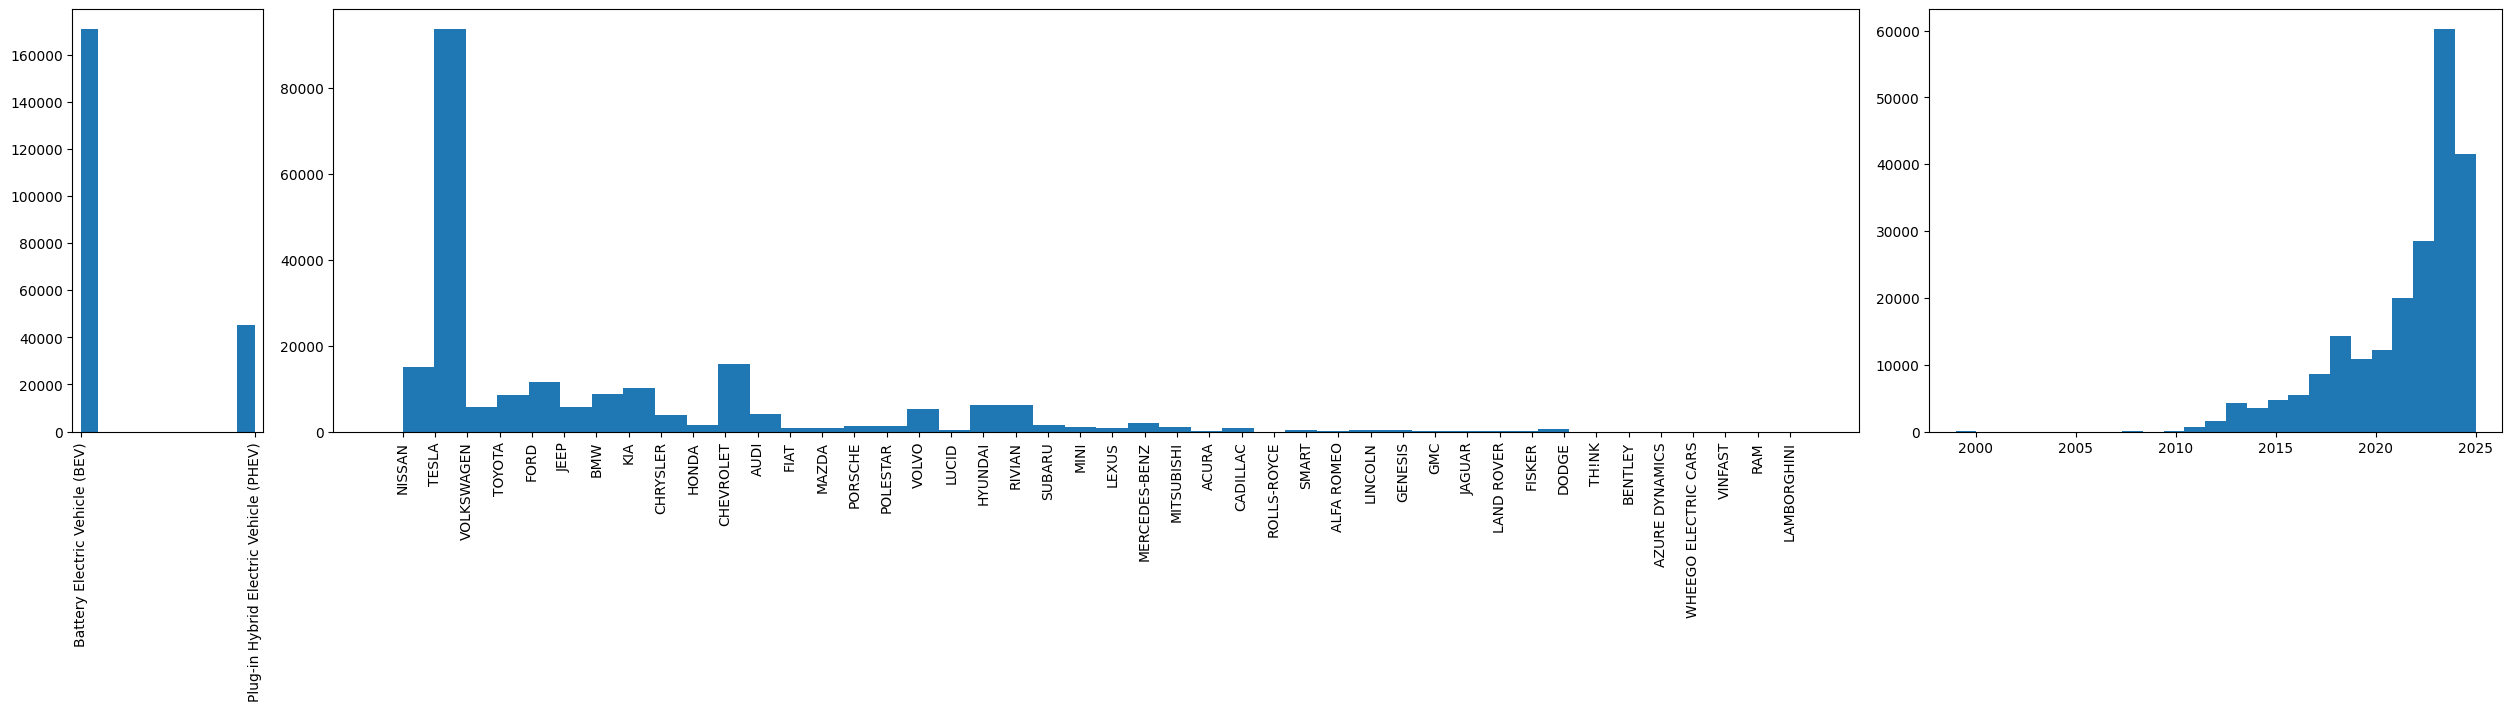

In [250]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, width_ratios=[1,8,3])
fig.set_constrained_layout(True)
fig.set_size_inches(5*5,7)
ax1.hist(df_wa["TYPE"])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

ax2.hist(df_wa["MAKE"], bins=len(df_wa["MAKE"].unique()))
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

ax3.hist(df_wa["MODEL_YEAR"], bins=25)

In [251]:
df_tesla = df_wa[df_wa["MAKE"] == "TESLA"]
df_tesla

,VIN,COUNTY,CITY,STATE,ZIP,MODEL_YEAR,MAKE,MODEL,TYPE,CAFV,E_RANGE,MSRP,DISTRICT,DOL_ID,LOCATION,E_UTILITY,2020_CENSUS,LOCATION_X,LOCATION_Y
1,5YJSA1E45K,King,Seattle,WA,98112,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0.0,43,101662900,"(-122.30207, 47.64085)",CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033006300,-122.30207,47.64085
5,5YJ3E1EA9L,Snohomish,Bothell,WA,98012,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,0.0,1,127104078,"(-122.21061, 47.83448)",PUGET SOUND ENERGY INC,53061052009,-122.21061,47.83448
6,5YJSA1E26J,Snohomish,Bothell,WA,98012,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249,0.0,1,104605490,"(-122.21061, 47.83448)",PUGET SOUND ENERGY INC,53061052009,-122.21061,47.83448
10,5YJ3E1EBXL,Kitsap,Bainbridge Island,WA,98110,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0.0,23,104355884,"(-122.521, 47.62728)",PUGET SOUND ENERGY INC,53035090902,-122.52100,47.62728
15,5YJXCAE20J,Snohomish,Bothell,WA,98012,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0.0,1,273626384,"(-122.21061, 47.83448)",PUGET SOUND ENERGY INC,53061052010,-122.21061,47.83448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216760,5YJ3E1EB5N,King,Redmond,WA,98053,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0.0,5,192923517,"(-122.03287, 47.68555)",PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032315,-122.03287,47.68555
216761,5YJYGDEF6M,Pierce,Sumner,WA,98390,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0.0,31,224771347,"(-122.23972, 47.2022)",PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53053073301,-122.23972,47.20220
216763,5YJ3E1EA6K,Lewis,Winlock,WA,98596,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0.0,19,328494099,"(-122.93881, 46.49114)",BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,53041971502,-122.93881,46.49114
216769,7SAYGAEE9R,King,Redmond,WA,98052,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0.0,48,274988388,"(-122.13158, 47.67858)",PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032325,-122.13158,47.67858


/tmp/ipykernel_32353/3886247769.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


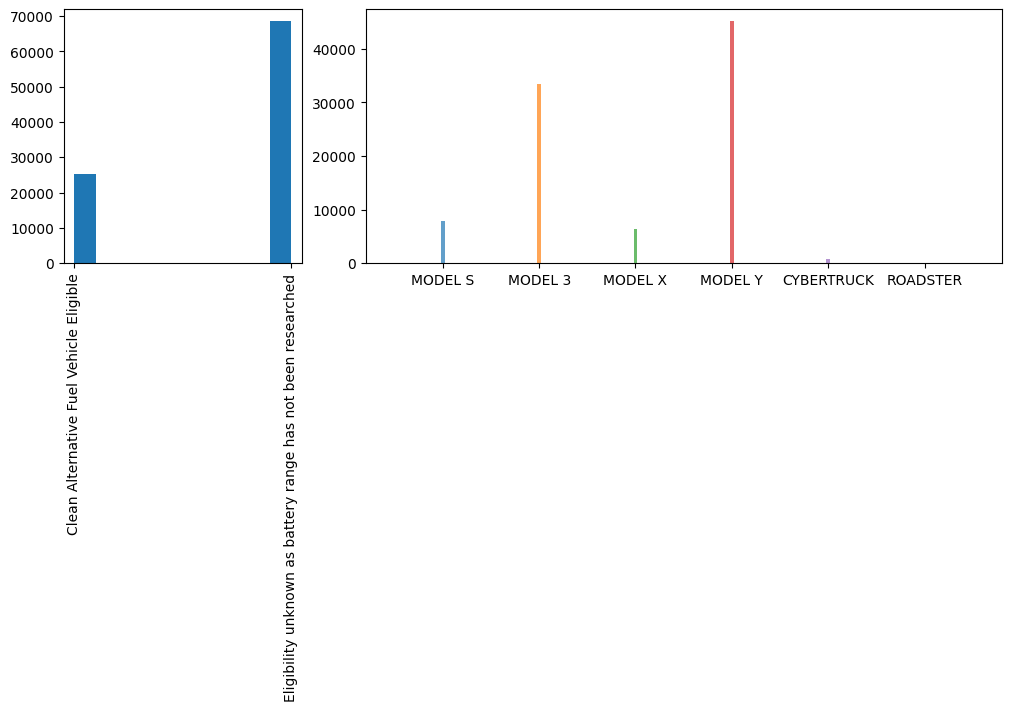

In [252]:
fig, (ax1, ax2) = plt.subplots(1,2, width_ratios=[3,8])
fig.set_constrained_layout(True)
fig.set_size_inches(5*2,7)

ax1.hist(df_tesla["CAFV"])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

colors = dict(zip(df_tesla["MODEL"].unique(), sns.color_palette("tab10", len(df_tesla["MODEL"].unique()))))
for model in df_tesla["MODEL"].unique():
    ax2.hist(df_tesla[df_tesla["MODEL"] == model]["MODEL"], 
             label=model,
             color=colors[model],
             alpha=0.7,  # Add some transparency to see overlapping
             bins=25)